In [33]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['figure.dpi']=500

In [2]:
df=pd.read_csv('Elon_musk.csv', encoding='cp1252')
df

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [4]:
lemm=WordNetLemmatizer()

In [5]:
corpus=[]
for i in range(len(df)):
    txt=re.sub('[^a-zA-Z]',' ',df['Text'][i])
    txt=txt.lower()
    txt=word_tokenize(txt)
    
    txt=[lemm.lemmatize(i) for i in txt if i not in stopwords.words('english')]
    txt=' '.join(txt)
           
    corpus.append(txt)
   
    


In [6]:
len(corpus)

1999

In [7]:
#!pip install TextBlob

In [8]:
from textblob import TextBlob

In [9]:
# Perform sentiment analysis
def get_sentiment(clean):
    analysis = TextBlob(clean)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
df['corpus']=corpus

In [11]:
df

Text  \
0                                @kunalb11 I’m an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                                 corpus  
0                                          kunalb alien  
1     id aa carmack ray tracing cyberpunk hdr next l...  
2                      joerogan spotify great interview  
3                             gtera doge underestimated  
4     teslacn congratulation tesla china amazing exe...  
...                                                 ...  
1994  flcnhvy true sound surreal negative propaganda...  
1995  ppathole make sure read ur term amp condition ...  
1996                  teslagong ppathole samwise gamgee  
1997                 ppathole altho dumb dumber u f u f  
1998                             progress update august  

[1999 rows x 2 columns]

In [12]:
df['sentiment']=df['corpus'].apply(get_sentiment)

In [13]:
sentiment_counts = df['sentiment'].value_counts()

In [14]:
print(sentiment_counts)

Neutral     925
Positive    859
Negative    215
Name: sentiment, dtype: int64


In [15]:
df


Text  \
0                                @kunalb11 I’m an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                                 corpus sentiment  
0                                          kunalb alien  Negative  
1     id aa carmack ray tracing cyberpunk hdr next l...   Neutral  
2                      joerogan spotify great interview  Positive  
3                             gtera doge underestimated   Neutral  
4     teslacn congratulation tesla china amazing exe...  Positive  
...                                                 ...       ...  
1994  flcnhvy true sound surreal negative propaganda...  Positive  
1995  ppathole make sure read ur term amp condition ...  Positive  
1996                  teslagong ppathole samwise gamgee   Neutral  
1997                 ppathole altho dumb dumber u f u f  Negative  
1998                             progress update august   Neutral  

[1999 rows x 3 columns]

C:\Users\Amol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

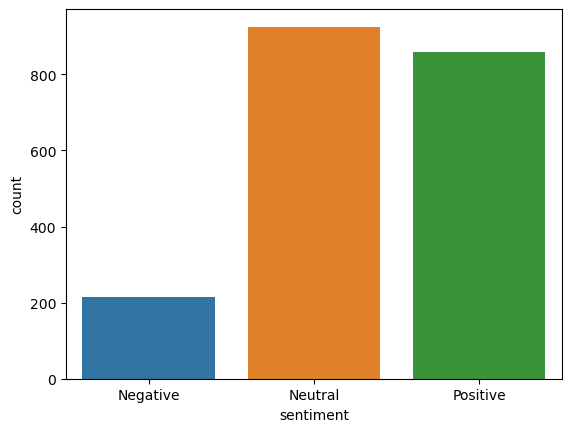

In [17]:
sns.countplot(df['sentiment'])

In [18]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

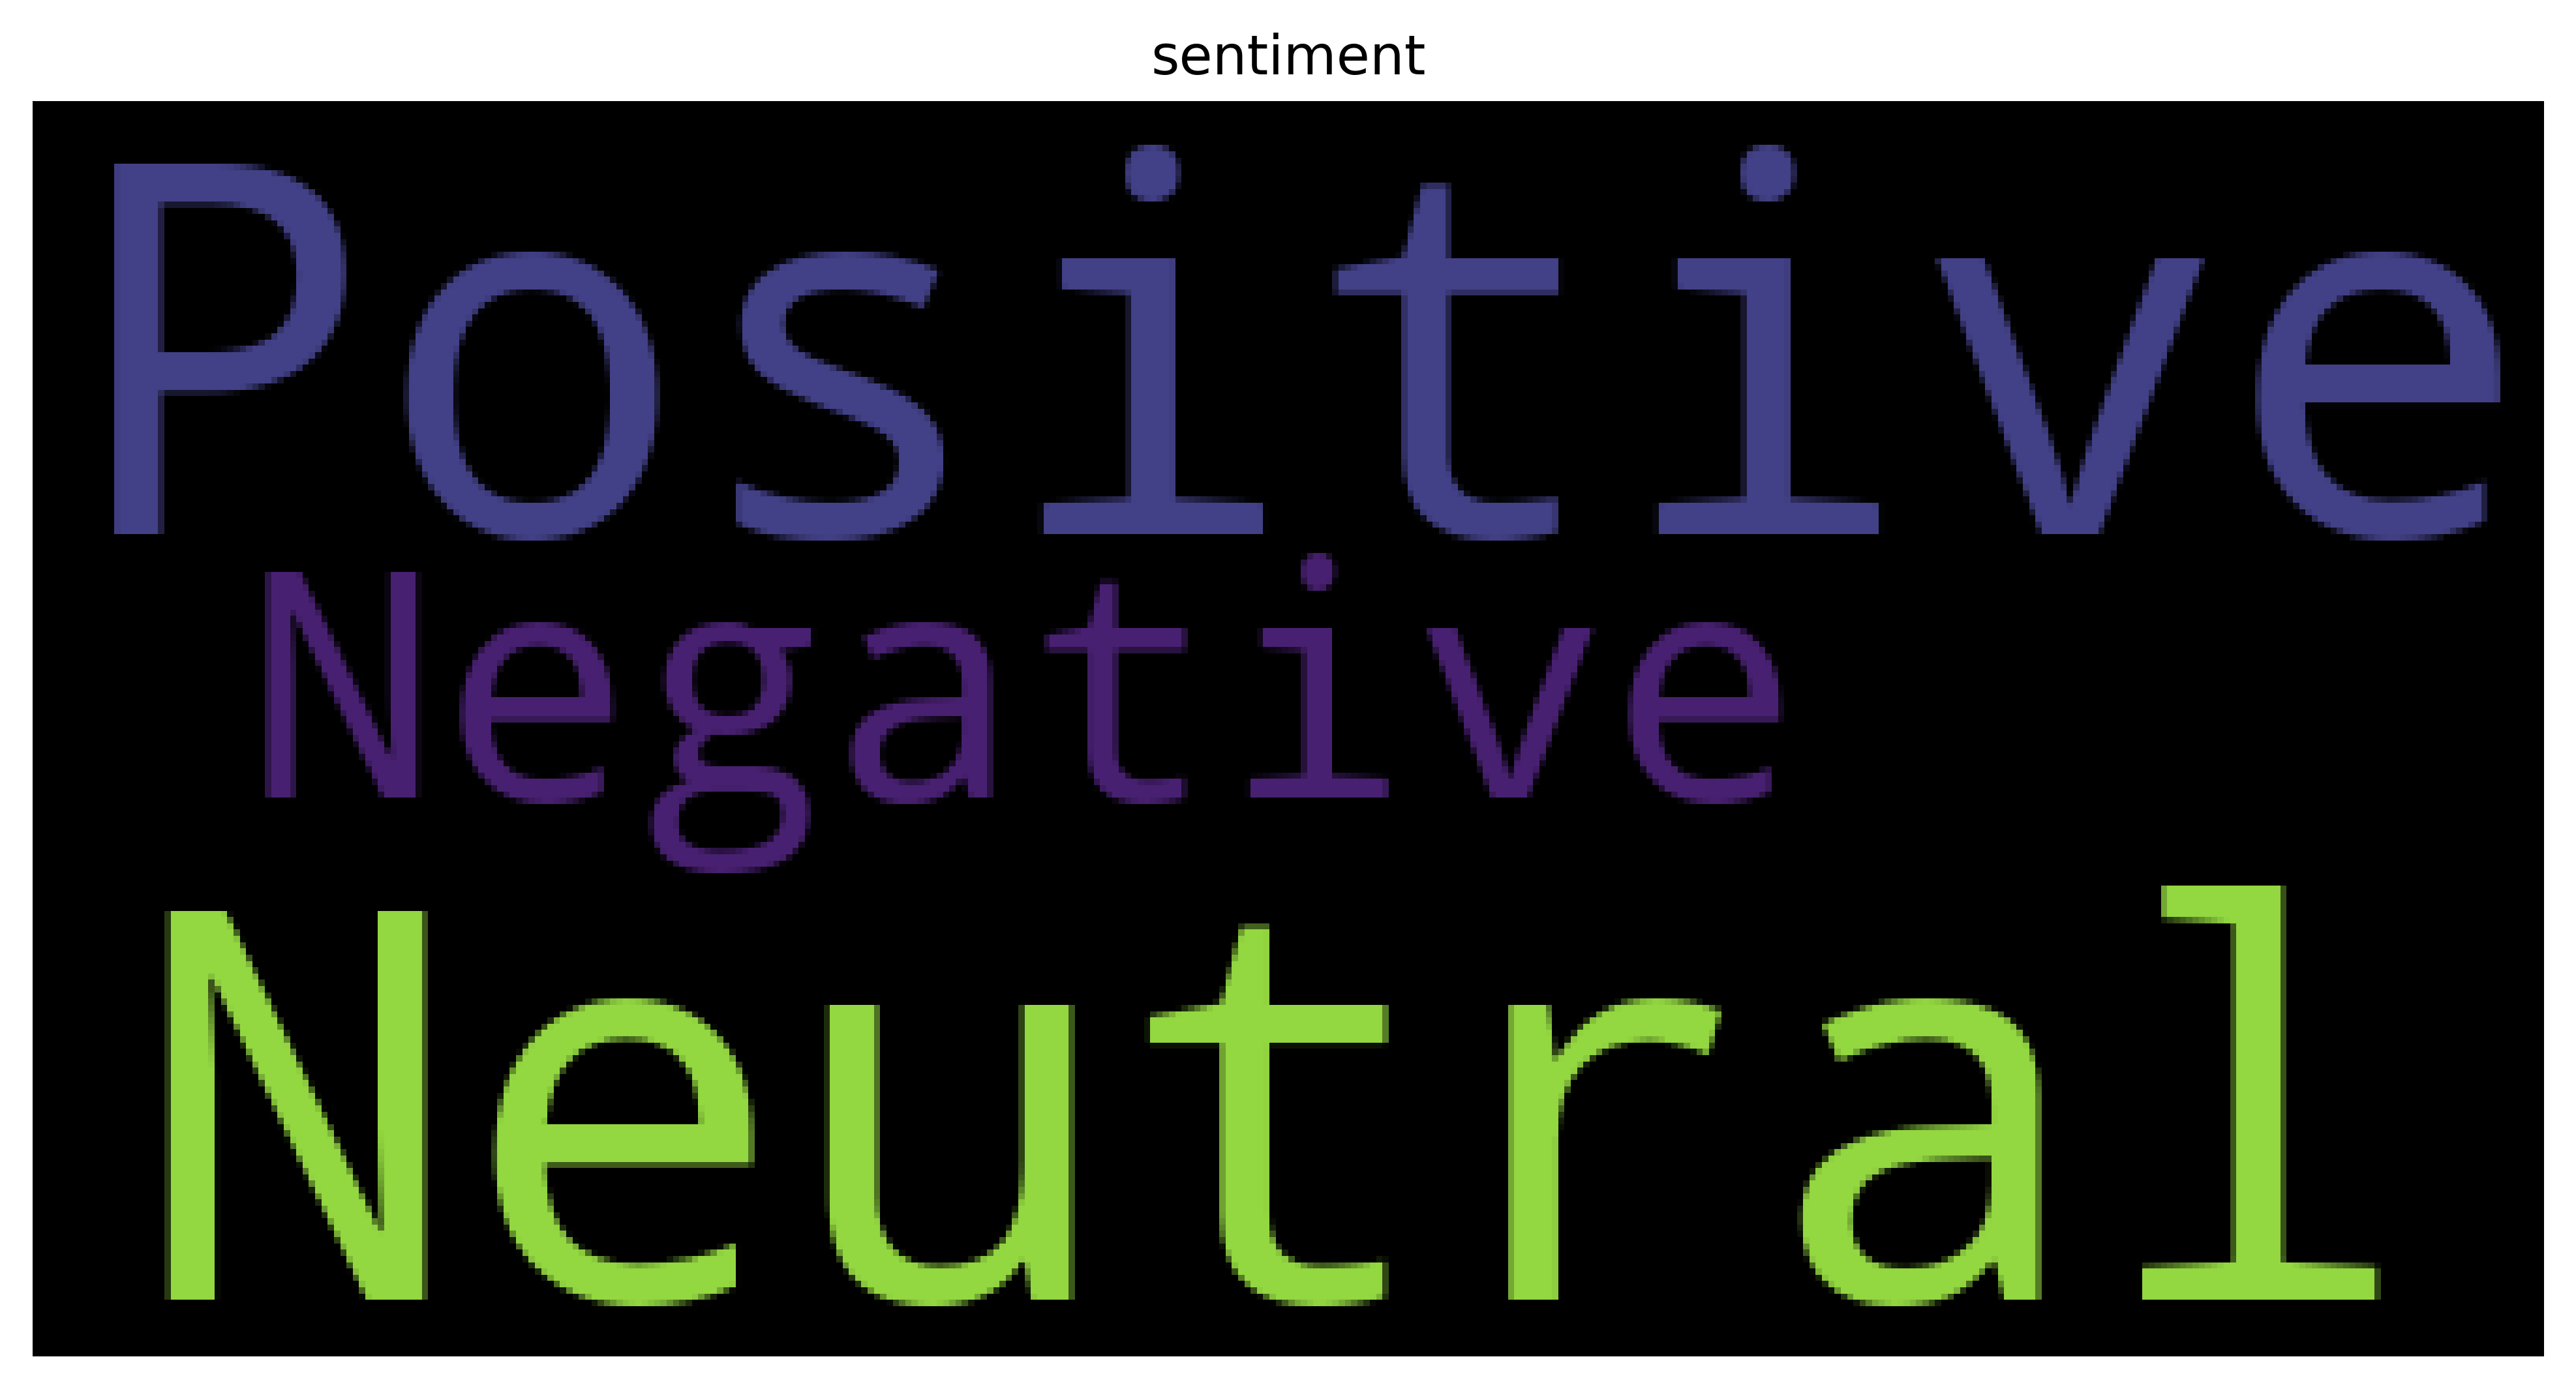

In [35]:

    txt=' '.join(df['sentiment'])
    wc=WordCloud(stopwords=STOPWORDS).generate(txt)
    plt.imshow(wc)
    plt.title('sentiment')
    plt.axis('off')

In [40]:
positive=df[df['sentiment']=='Positive']
negative=df[df['sentiment']=='Negative']
neutral=df[df['sentiment']=='Neutral']

In [37]:
def word_cloud(data,label):
    txt=' '.join(data['corpus'])
    wc=WordCloud(background_color='grey',
                 width=2000,
                    height=1600,stopwords=STOPWORDS).generate(txt)
    plt.imshow(wc)
    plt.title('sentiment')
    plt.axis('off')

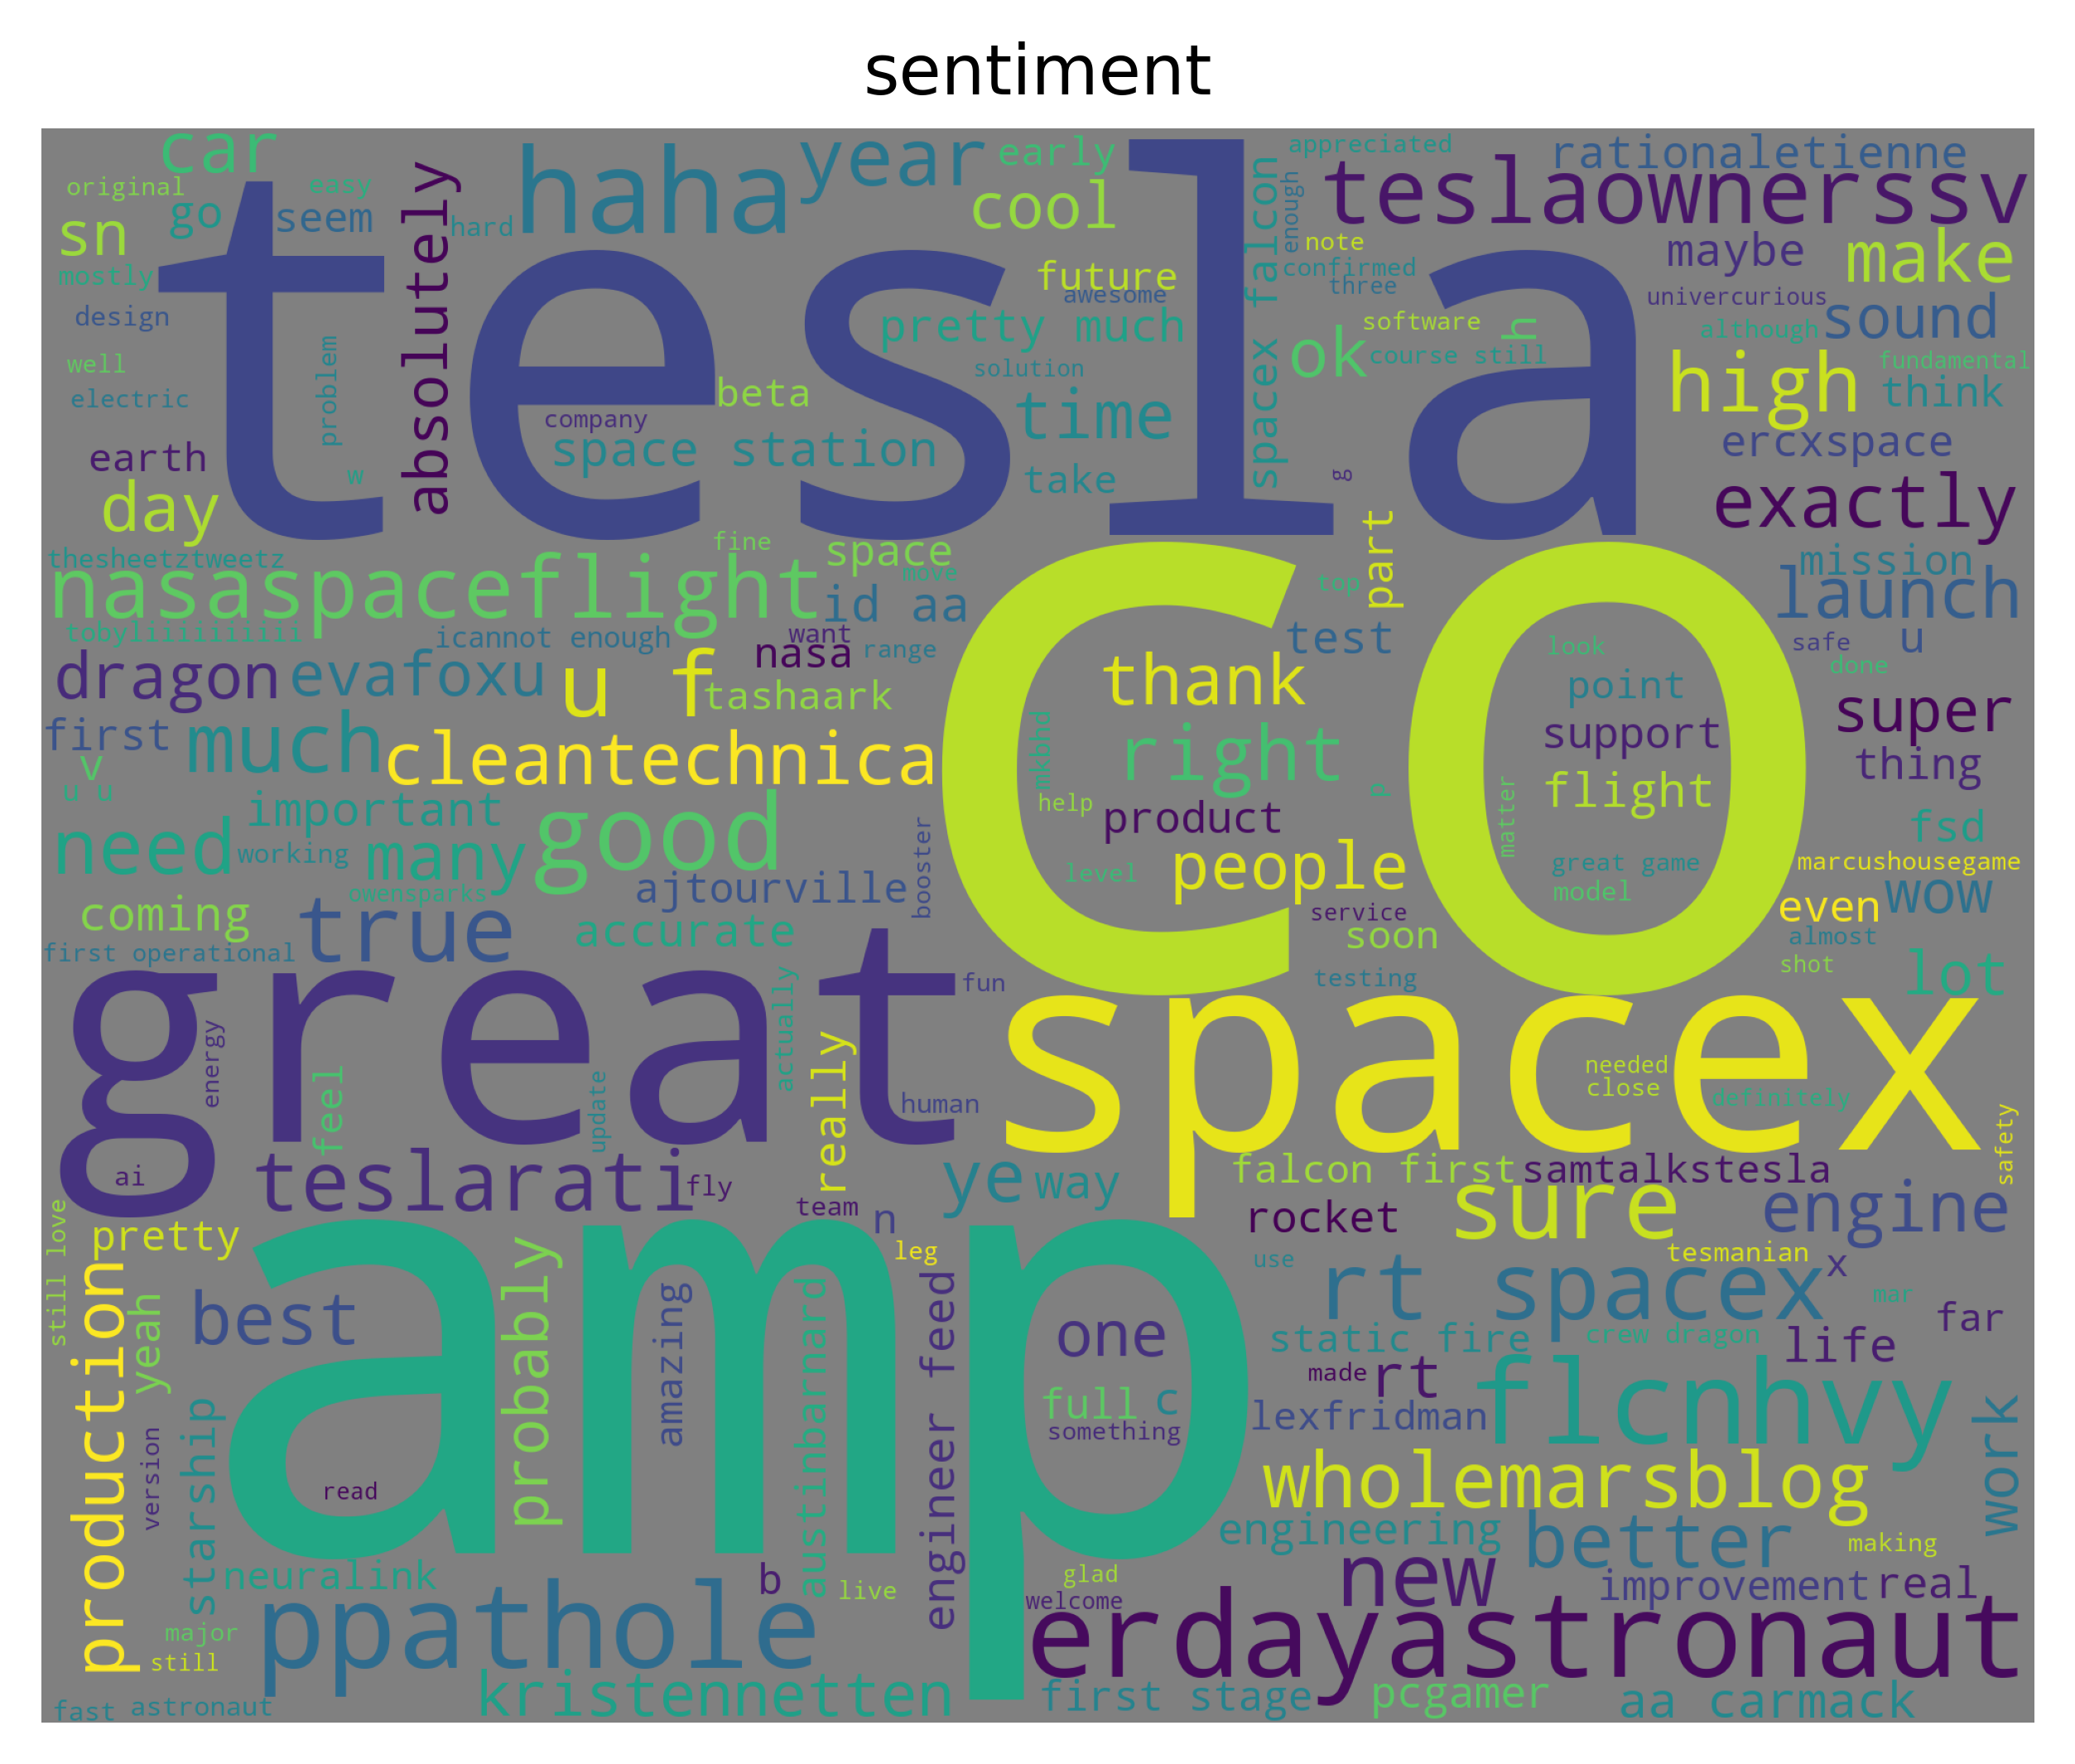

In [38]:
word_cloud(positive,'Postive_Words')

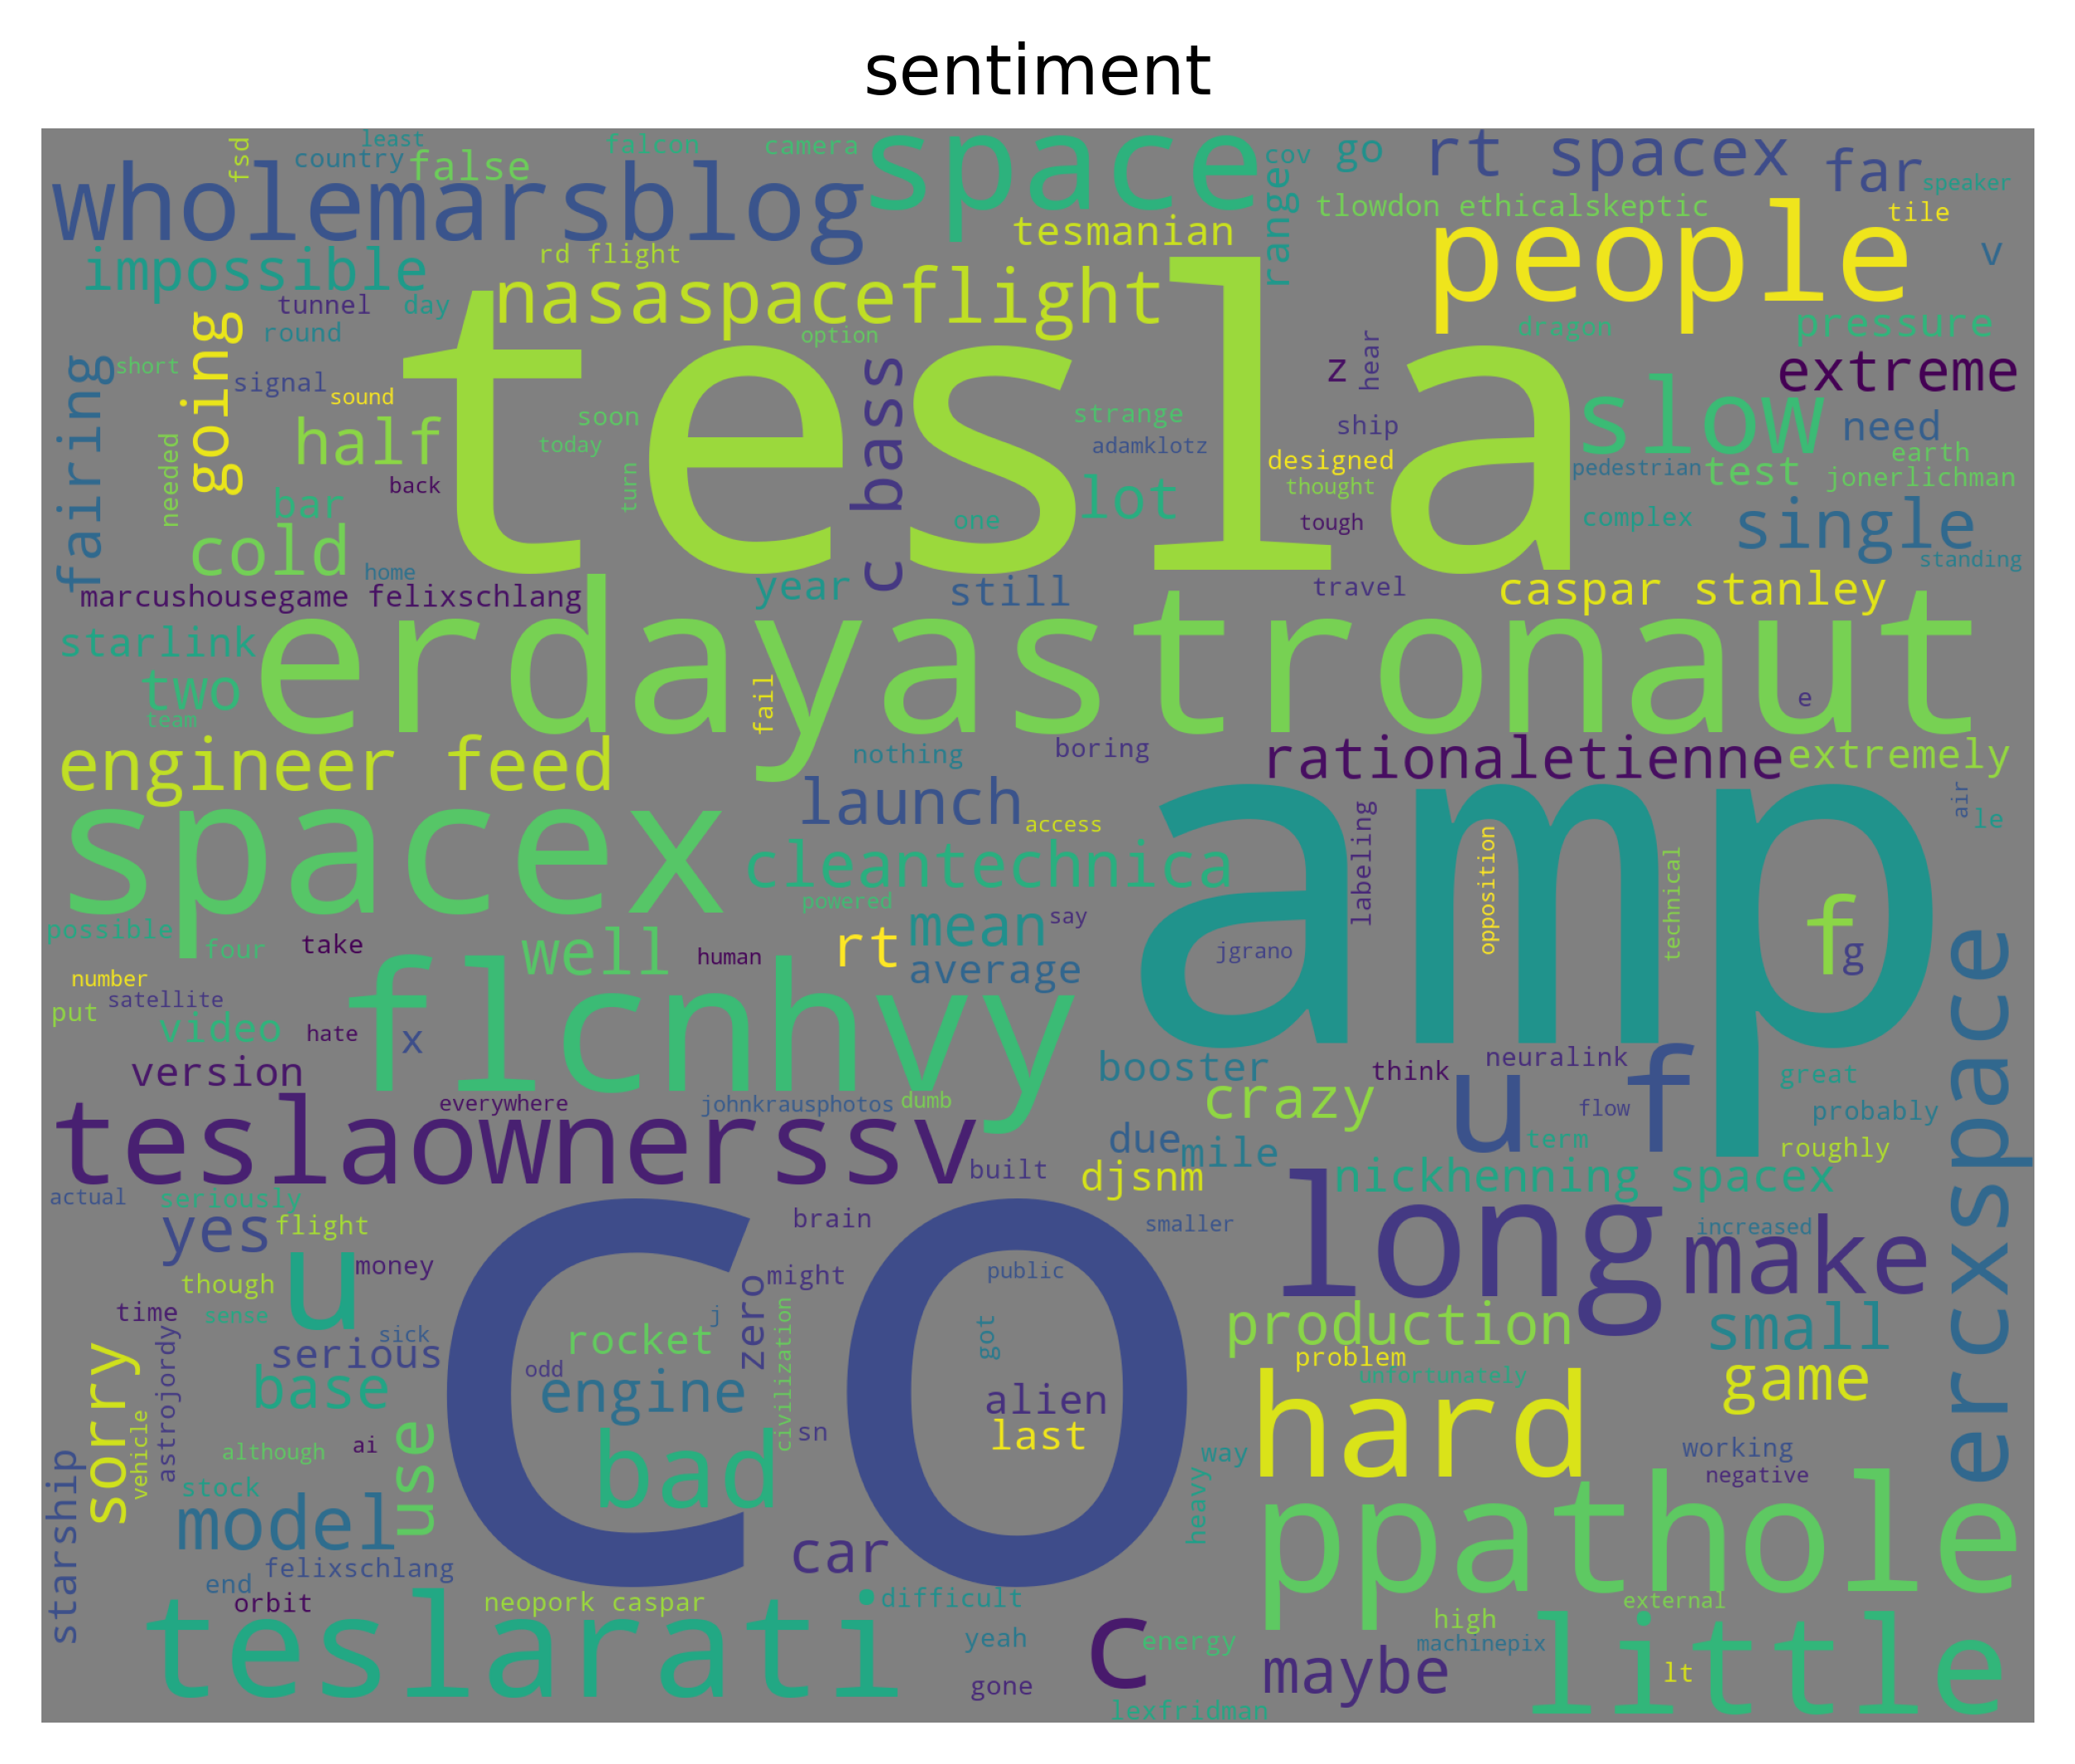

In [39]:
word_cloud(negative,'Negative Word')

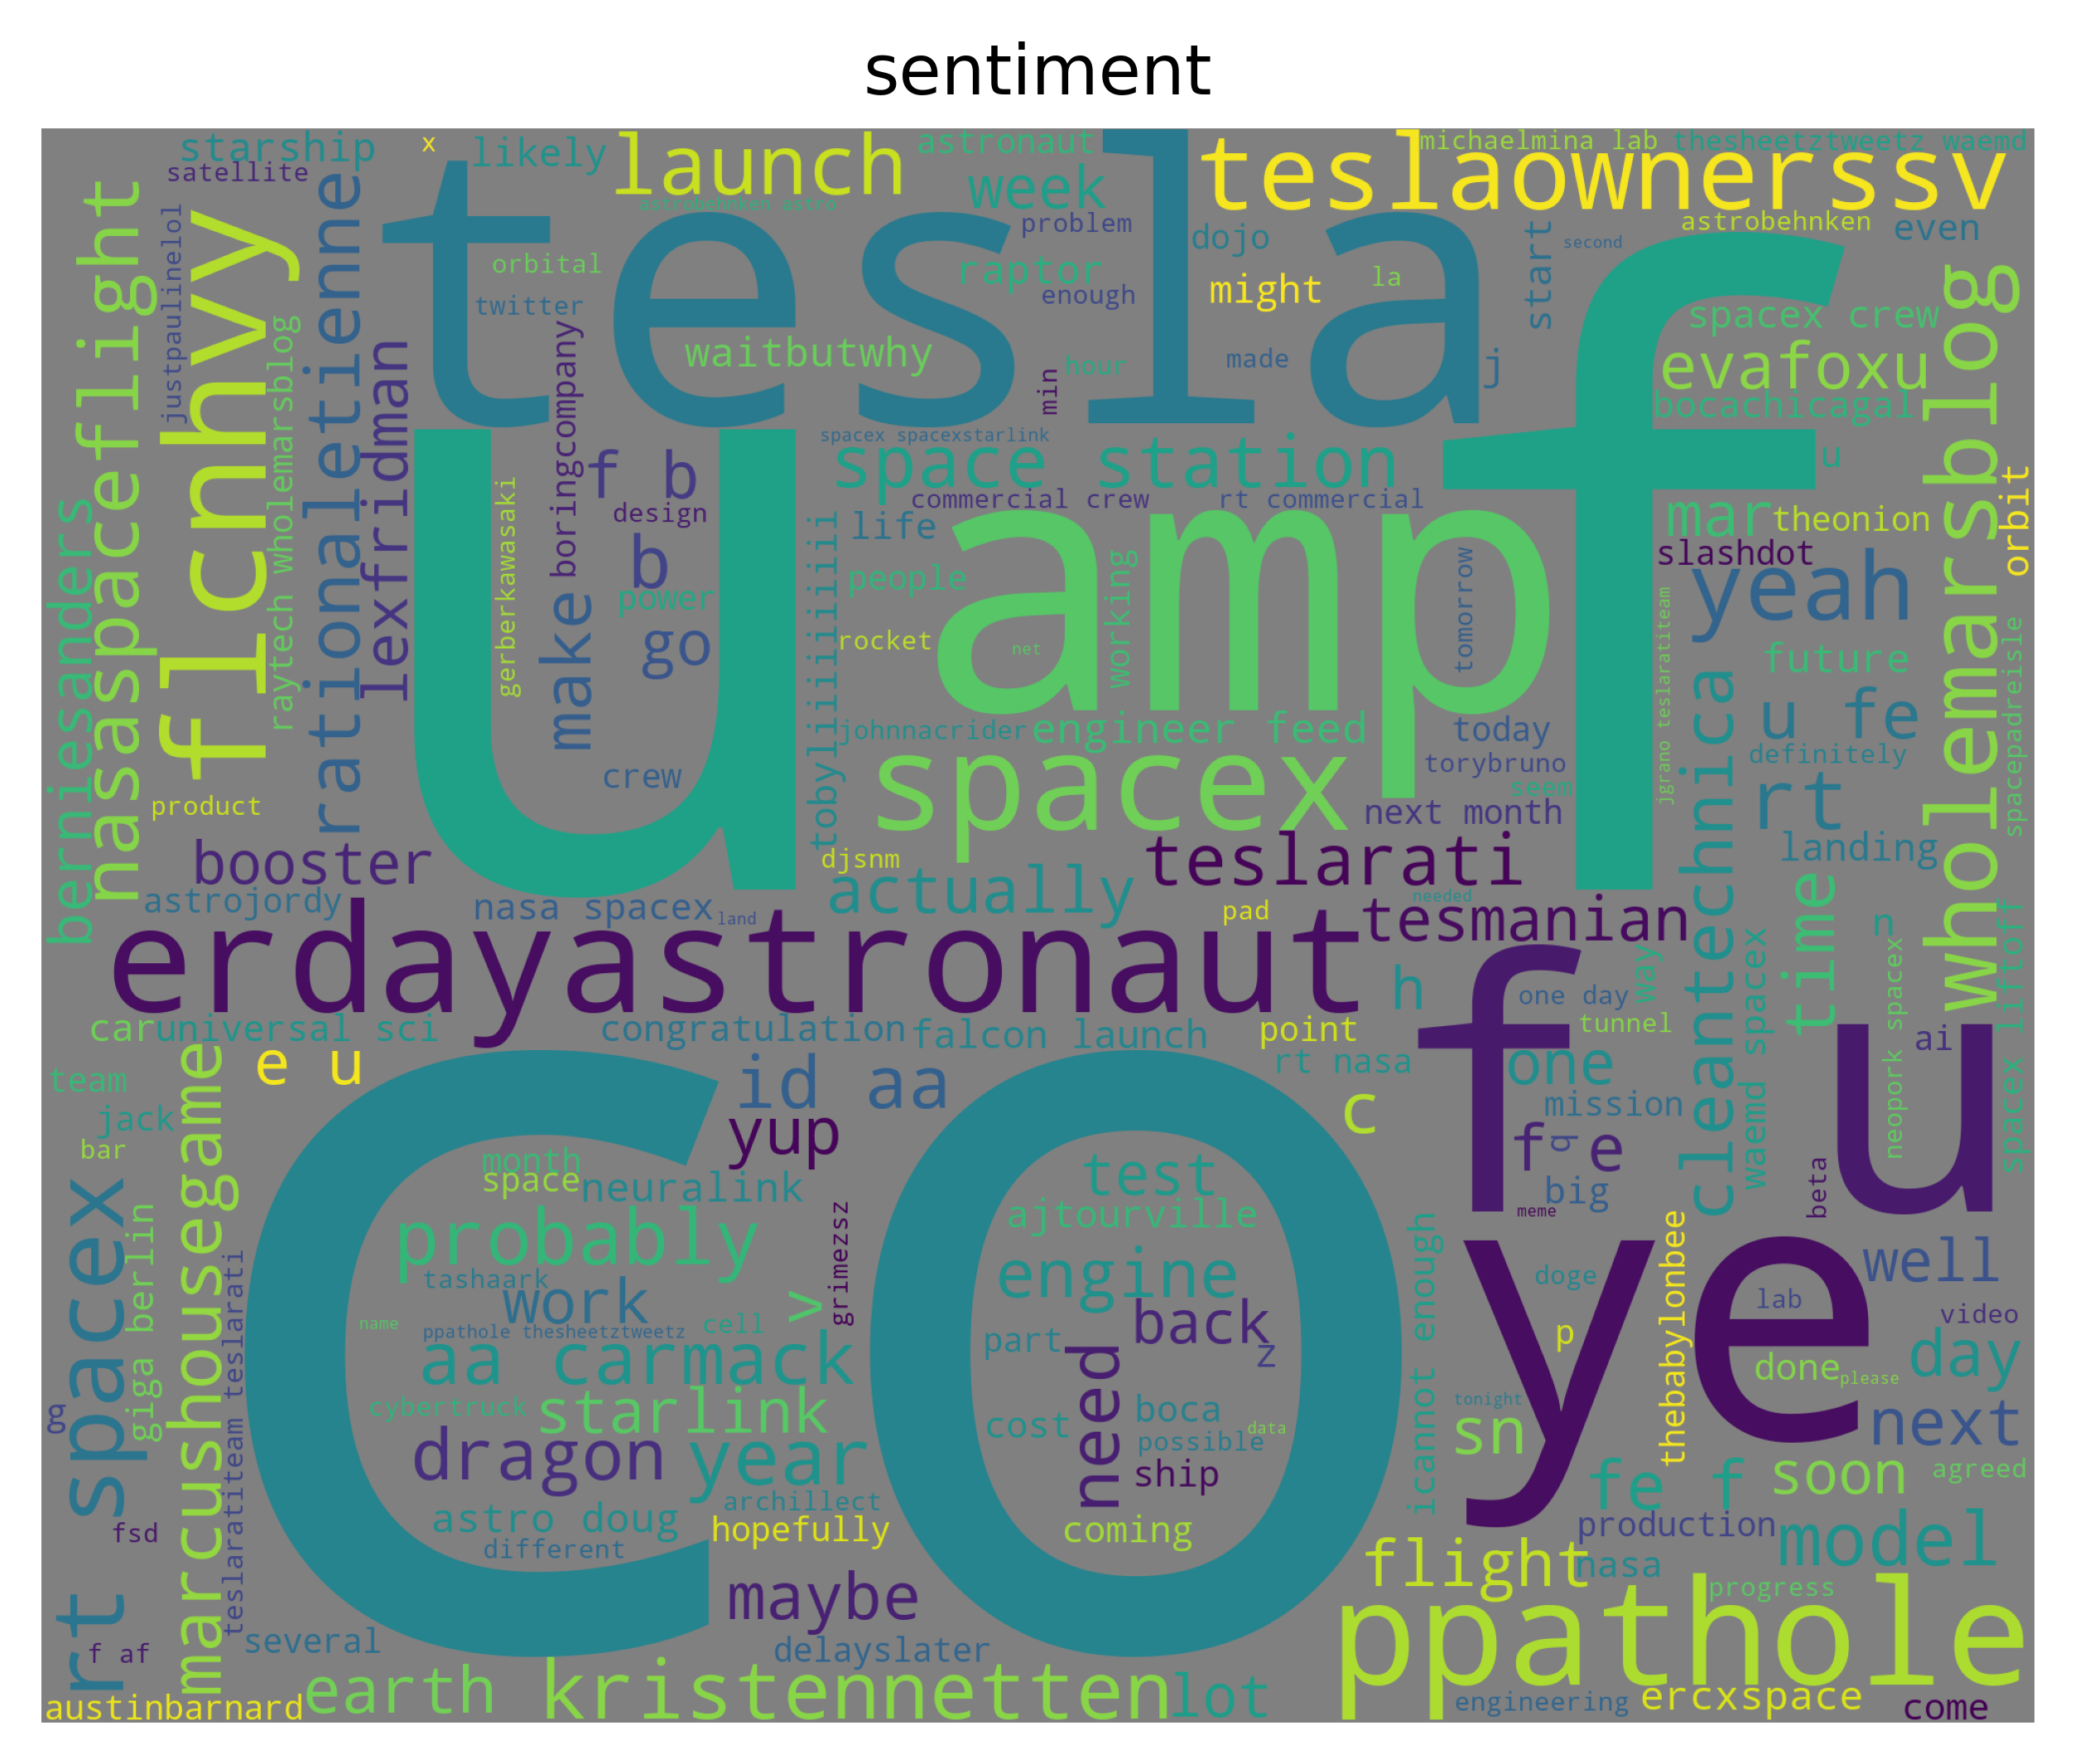

In [43]:
word_cloud(neutral,'neutral Word')